## 1. Tweet classification: Trump vs. Trudeau
<p>So you think you can classify text? How about tweets? In this notebook, we'll take a dive into the world of social media text classification by investigating how to properly classify tweets from two prominent North American politicians: Donald Trump and Justin Trudeau.</p>
<p><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/President_Donald_Trump_and_Prime_Minister_Justin_Trudeau_Joint_Press_Conference%2C_February_13%2C_2017.jpg/800px-President_Donald_Trump_and_Prime_Minister_Justin_Trudeau_Joint_Press_Conference%2C_February_13%2C_2017.jpg" alt="Donald Trump and Justin Trudeau shaking hands." height="50%" width="50%"></p>
<p><a href="https://commons.wikimedia.org/wiki/File:President_Donald_Trump_and_Prime_Minister_Justin_Trudeau_Joint_Press_Conference,_February_13,_2017.jpg">Photo Credit: Executive Office of the President of the United States</a></p>
<p>Tweets pose specific problems to NLP, including the fact they are shorter texts. There are also plenty of platform-specific conventions to give you hassles: mentions, #hashtags, emoji, links and short-hand phrases (ikr?). Can we overcome those challenges and build a useful classifier for these two tweeters? Yes! Let's get started.</p>
<p>To begin, we will import all the tools we need from scikit-learn. We will need to properly vectorize our data (<code>CountVectorizer</code> and <code>TfidfVectorizer</code>). And we will also want to import some models, including <code>MultinomialNB</code> from the <code>naive_bayes</code> module, <code>LinearSVC</code> from the <code>svm</code> module and <code>PassiveAggressiveClassifier</code> from the <code>linear_model</code> module. Finally, we'll need <code>sklearn.metrics</code> and <code>train_test_split</code> and <code>GridSearchCV</code> from the <code>model_selection</code> module to evaluate and optimize our model.</p>

In [130]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics


## 2. Transforming our collected data
<p>To begin, let's start with a corpus of tweets which were collected in November 2017. They are available in CSV format. We'll use a Pandas DataFrame to help import the data and pass it to scikit-learn for further processing.</p>
<p>Since the data has been collected via the Twitter API and not split into test and training sets, we'll need to do this. Let's use <code>train_test_split()</code> with <code>random_state=53</code> and a test size of 0.33, just as we did in the DataCamp course. This will ensure we have enough test data and we'll get the same results no matter where or when we run this code.</p>

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset into a DataFrame
tweet_df = pd.read_csv('datasets/tweets.csv')

# Create target labels y equal to the author column
y = tweet_df['author']

# Use train_test_split with the status column as your data and y as the target
X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'], y, test_size=0.33, random_state=53)

# Display the shapes of the split data to ensure everything is correct
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (268,)
X_test shape: (132,)
y_train shape: (268,)
y_test shape: (132,)


## 3. Vectorize the tweets
<p>We have the training and testing data all set up, but we need to create vectorized representations of the tweets in order to apply machine learning.</p>
<p>To do so, we will utilize the <code>CountVectorizer</code> and <code>TfidfVectorizer</code> classes which we will first need to fit to the data.</p>
<p>Once this is complete, we can start modeling with the new vectorized tweets!</p>

In [134]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Create count_train and count_test
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Create tfidf_train and tfidf_test
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


## 4. Training a multinomial naive Bayes model
<p>Now that we have the data in vectorized form, we can train the first model. Investigate using the Multinomial Naive Bayes model with both the <code>CountVectorizer</code> and <code>TfidfVectorizer</code> data. Which do will perform better? How come?</p>
<p>To assess the accuracies, we will print the test sets accuracy scores for both models.</p>

In [136]:
# Initialize Multinomial Naive Bayes Classifier for TF-IDF data
tfidf_nb = MultinomialNB()

# Fit the model
tfidf_nb.fit(tfidf_train, y_train)

# Predict the test data
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy score
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

# Initialize Multinomial Naive Bayes Classifier for CountVectorizer data
count_nb = MultinomialNB()

# Fit the model
count_nb.fit(count_train, y_train)

# Predict the test data
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy score
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

# Display the results using format method
print('TF-IDF Naive Bayes accuracy: {:.4f}'.format(tfidf_nb_score))
print('CountVectorizer Naive Bayes accuracy: {:.4f}'.format(count_nb_score))


TF-IDF Naive Bayes accuracy: 0.8030
CountVectorizer Naive Bayes accuracy: 0.7955


## 5. Evaluating our model using a confusion matrix
<p>We see that the TF-IDF model performs better than the count-based approach. Based on what we know from the NLP fundamentals course, why might that be? We know that TF-IDF allows unique tokens to have a greater weight - perhaps tweeters are using specific important words that identify them! Let's continue the investigation.</p>
<p>For classification tasks, an accuracy score doesn't tell the whole picture. A better evaluation can be made if we look at the confusion matrix, which shows the number correct and incorrect classifications based on each class. We can use the metrics, True Positives, False Positives, False Negatives, and True Negatives, to determine how well the model performed on a given class. How many times was Trump misclassified as Trudeau?</p>

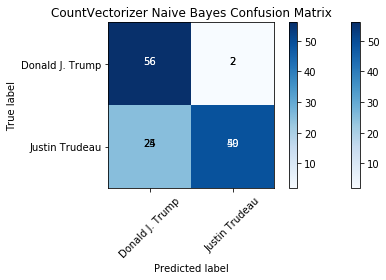

In [138]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Load the dataset
df = pd.read_csv('datasets/tweets.csv')

# Create target labels y equal to the author column
y = df['author']

# Use train_test_split with the status column as your data and y as the target
X_train, X_test, y_train, y_test = train_test_split(df['status'], y, test_size=0.33, random_state=53)

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Create count_train and count_test
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Create tfidf_train and tfidf_test
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes Classifier for TF-IDF data
tfidf_nb = MultinomialNB()

# Fit the model
tfidf_nb.fit(tfidf_train, y_train)

# Predict the test data
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy score
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

# Initialize Multinomial Naive Bayes Classifier for CountVectorizer data
count_nb = MultinomialNB()

# Fit the model
count_nb.fit(count_train, y_train)

# Predict the test data
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy score
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

# Define class labels
labels = ['Donald J. Trump', 'Justin Trudeau']

# Create confusion matrices
tfidf_nb_cm = confusion_matrix(y_test, tfidf_nb_pred, labels=labels)
count_nb_cm = confusion_matrix(y_test, count_nb_pred, labels=labels)

# Define the plot_confusion_matrix function
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues, figure=None):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figure)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the TF-IDF confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=labels, title='TF-IDF Naive Bayes Confusion Matrix')

# Plot the CountVectorizer confusion matrix
plot_confusion_matrix(count_nb_cm, classes=labels, title='CountVectorizer Naive Bayes Confusion Matrix', figure=1)

# Display the plots
plt.show()


## 6. Trying out another classifier: Linear SVC
<p>So the Bayesian model only has one prediction difference between the TF-IDF and count vectorizers -- fairly impressive! Interestingly, there is some confusion when the predicted label is Trump but the actual tweeter is Trudeau. If we were going to use this model, we would want to investigate what tokens are causing the confusion in order to improve the model. </p>
<p>Now that we've seen what the Bayesian model can do, how about trying a different approach? <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html">LinearSVC</a> is another popular choice for text classification. Let's see if using it with the TF-IDF vectors improves the accuracy of the classifier!</p>

TF-IDF Naive Bayes accuracy: 0.8030
CountVectorizer Naive Bayes accuracy: 0.7955
TF-IDF LinearSVC accuracy: 0.8409


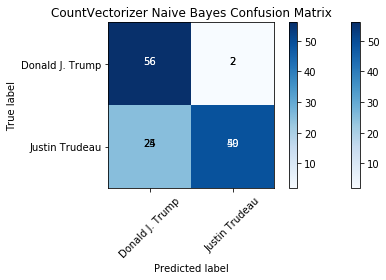

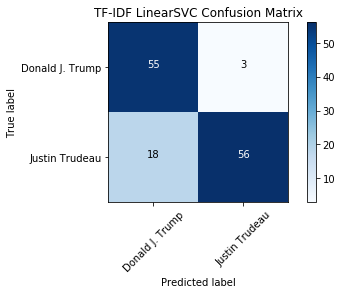

In [140]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Load the dataset
df = pd.read_csv('datasets/tweets.csv')

# Create target labels y equal to the author column
y = df['author']

# Use train_test_split with the status column as your data and y as the target
X_train, X_test, y_train, y_test = train_test_split(df['status'], y, test_size=0.33, random_state=53)

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Create count_train and count_test
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Create tfidf_train and tfidf_test
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes Classifier for TF-IDF data
tfidf_nb = MultinomialNB()

# Fit the model
tfidf_nb.fit(tfidf_train, y_train)

# Predict the test data
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy score
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

# Initialize Multinomial Naive Bayes Classifier for CountVectorizer data
count_nb = MultinomialNB()

# Fit the model
count_nb.fit(count_train, y_train)

# Predict the test data
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy score
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

# Define class labels
labels = ['Donald J. Trump', 'Justin Trudeau']

# Create confusion matrices
tfidf_nb_cm = confusion_matrix(y_test, tfidf_nb_pred, labels=labels)
count_nb_cm = confusion_matrix(y_test, count_nb_pred, labels=labels)

# Define the plot_confusion_matrix function
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues, figure=None):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figure)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the TF-IDF confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=labels, title='TF-IDF Naive Bayes Confusion Matrix')

# Plot the CountVectorizer confusion matrix
plot_confusion_matrix(count_nb_cm, classes=labels, title='CountVectorizer Naive Bayes Confusion Matrix', figure=1)

# Initialize Linear Support Vector Classifier for TF-IDF data
tfidf_svc = LinearSVC()

# Fit the model
tfidf_svc.fit(tfidf_train, y_train)

# Predict the test data
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculate the accuracy score
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

# Create confusion matrix
svc_cm = confusion_matrix(y_test, tfidf_svc_pred, labels=labels)

# Plot the confusion matrix
plot_confusion_matrix(svc_cm, classes=labels, title='TF-IDF LinearSVC Confusion Matrix', figure=2)

# Display the accuracy scores
print('TF-IDF Naive Bayes accuracy: {:.4f}'.format(tfidf_nb_score))
print('CountVectorizer Naive Bayes accuracy: {:.4f}'.format(count_nb_score))
print('TF-IDF LinearSVC accuracy: {:.4f}'.format(tfidf_svc_score))

# Display the plots
plt.show()


## 7. Introspecting our top model
<p>Wow, the LinearSVC model is even better than the Multinomial Bayesian one. Nice work! Via the confusion matrix we can see that, although there is still some confusion where Trudeau's tweets are classified as Trump's, the False Positive rate is better than the previous model. So, we have a performant model, right? </p>
<p>We might be able to continue tweaking and improving all of the previous models by learning more about parameter optimization or applying some better preprocessing of the tweets. </p>
<p>Now let's see what the model has learned. Using the LinearSVC Classifier with two classes (Trump and Trudeau) we can sort the features (tokens), by their weight and see the most important tokens for both Trump and Trudeau. What are the most Trump-like or Trudeau-like words? Did the model learn something useful to distinguish between these two men? </p>

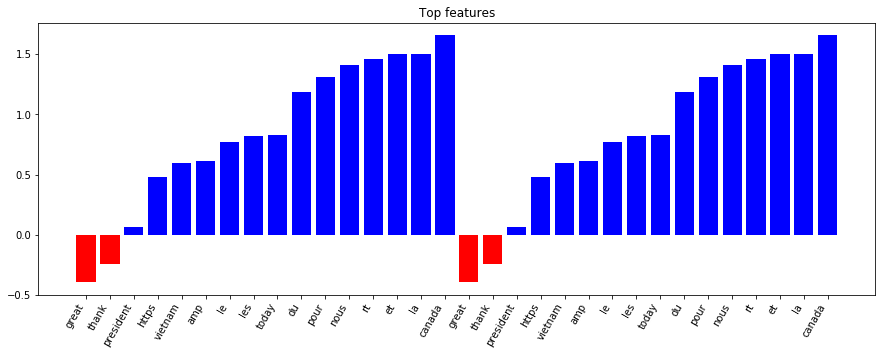

[(-0.39597997876486407, 'great'),
 (-0.2464572702722314, 'thank'),
 (0.06256591570269623, 'president'),
 (0.4821242789238318, 'https'),
 (0.5960488900082963, 'vietnam'),
 (0.6155549063182879, 'amp'),
 (0.7725774092741061, 'le'),
 (0.8213717711134251, 'les'),
 (0.8286601121382489, 'today'),
 (1.1869052362675085, 'du'),
 (1.3143579851690121, 'pour'),
 (1.4122652590115448, 'nous'),
 (1.461276647980085, 'rt'),
 (1.4991727301886746, 'et'),
 (1.505646750299376, 'la'),
 (1.6567964027410824, 'canada'),
 (-0.39597997876486407, 'great'),
 (-0.2464572702722314, 'thank'),
 (0.06256591570269623, 'president'),
 (0.4821242789238318, 'https'),
 (0.5960488900082963, 'vietnam'),
 (0.6155549063182879, 'amp'),
 (0.7725774092741061, 'le'),
 (0.8213717711134251, 'les'),
 (0.8286601121382489, 'today'),
 (1.1869052362675085, 'du'),
 (1.3143579851690121, 'pour'),
 (1.4122652590115448, 'nous'),
 (1.461276647980085, 'rt'),
 (1.4991727301886746, 'et'),
 (1.505646750299376, 'la'),
 (1.6567964027410824, 'canada')]


In [142]:
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

def plot_and_return_top_features(clf, vect, top_n=20):
    """
    Plot the top features of the classifier

    Parameters:
    - clf: trained classifier
    - vect: vectorizer
    - top_n: number of top features to plot

    Returns:
    - top_features: list of top features and their weights
    """
    feature_names = vect.get_feature_names()  # Use get_feature_names for older versions
    coef = clf.coef_.flatten()
    
    # Get indices of top positive and negative coefficients
    top_positive_coefficients = np.argsort(coef)[-top_n:]
    top_negative_coefficients = np.argsort(coef)[:top_n]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # Ensure the lengths match
    top_features = [(coef[i], feature_names[i]) for i in top_coefficients]

    # Create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if coef[i] < 0 else 'blue' for i in top_coefficients]
    plt.bar(np.arange(len(top_coefficients)), [coef[i] for i in top_coefficients], color=colors)
    plt.xticks(np.arange(len(top_coefficients)), [feature_names[i] for i in top_coefficients], rotation=60, ha='right')
    plt.title("Top features")
    plt.show()
    
    return top_features

# Use the top performing model (assuming tfidf_svc)
top_features = plot_and_return_top_features(tfidf_svc, tfidf_vectorizer)

# Print top features
pprint(top_features)

# Create tweets
trump_tweet = "America is stronger than ever before! #MAGA"
trudeau_tweet = "Canada is committed to addressing climate change and ensuring equality for all citizens."

# Transform the tweets using the TF-IDF vectorizer
trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

# Predict the labels using the trained LinearSVC model
trump_tweet_pred = tfidf_svc.predict(trump_tweet_vectorized)
trudeau_tweet_pred = tfidf_svc.predict(trudeau_tweet_vectorized)

# Print the predictions using format method
print("Trump tweet prediction: {}".format(trump_tweet_pred[0]))
print("Trudeau tweet prediction: {}".format(trudeau_tweet_pred[0]))


## 8. Bonus: can you write a Trump or Trudeau tweet?
<p>So, what did our model learn? It seems like it learned that Trudeau tweets in French!</p>
<p>I challenge you to write your own tweet using the knowledge gained to trick the model! Use the printed list or plot above to make some inferences about what words will classify your text as Trump or Trudeau. Can you fool the model into thinking you are Trump or Trudeau?</p>
<p>If you can write French, feel free to make your Trudeau-impersonation tweet in French! As you may have noticed, these French words are common words, or, "stop words". You could remove both English and French stop words from the tweets as a preprocessing step, but that might decrease the accuracy of the model because Trudeau is the only French-speaker in the group. If you had a dataset with more than one French speaker, this would be a useful preprocessing step.</p>
<p>Future work on this dataset could involve:</p>
<ul>
<li>Add extra preprocessing (such as removing URLs or French stop words) and see the effects</li>
<li>Use GridSearchCV to improve both your Bayesian and LinearSVC models by finding the optimal parameters</li>
<li>Introspect your Bayesian model to determine what words are more Trump- or Trudeau- like</li>
<li>Add more recent tweets to your dataset using tweepy and retrain</li>
</ul>
<p>Good luck writing your impersonation tweets -- feel free to share them on Twitter!</p>

In [144]:
# Create tweets
trump_tweet = "America is stronger than ever before! #MAGA"
trudeau_tweet = "Canada is committed to addressing climate change and ensuring equality for all citizens."

# Transform the tweets using the TF-IDF vectorizer
trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

# Predict the labels using the trained LinearSVC model
trump_tweet_pred = tfidf_svc.predict(trump_tweet_vectorized)
trudeau_tweet_pred = tfidf_svc.predict(trudeau_tweet_vectorized)

# Print the predictions
print("Trump tweet prediction: {}".format(trump_tweet_pred[0]))
print("Trudeau tweet prediction: {}".format(trudeau_tweet_pred[0]))


Trump tweet prediction: Donald J. Trump
Trudeau tweet prediction: Justin Trudeau
